In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
import glob

sns.set()
outputext = "jpg"

try:
    os.mkdir("plots")
except:
    pass

# Phantom Jams

In [2]:
#Prepare relevant plot directories
try:
    os.mkdir("plots\Jams")
    os.mkdir("plots\Jams\\"+outputext)
except:
    pass

In [3]:
jamdata = pd.read_csv("Jams.csv")

## Plotting each case

In [4]:
for reaction in jamdata["Reaction"].unique():
    for density in jamdata["Total Cars"].unique():
        for asocialrate in jamdata["ASocial Rate"].unique():
            sns.scatterplot(x = "Time", y = "Y", s = 20,
                        data = jamdata[(jamdata["Total Cars"] == density) & 
                                       (jamdata["Reaction"] == reaction) & 
                                       (jamdata["ASocial Rate"] == asocialrate)])
    
            plt.title("Location of Traffic Jams\n(%s cars, %s asocial rate, %s reaction time)" % (density, asocialrate, reaction))
    
            plt.xlabel("Time (s)")
            plt.ylabel("Position on Road")
    
            plt.xlim(xmin = jamdata["Time"].min(), xmax = jamdata["Time"].max())
            plt.ylim(ymin = 0, ymax = 300)
    
            plt.savefig("plots\Jams\\" 
                        + outputext 
                        + "\jamlocation_%scars_%sasocial_%sreaction." % (density, asocialrate, reaction) 
                        + outputext)
            plt.clf()
            #plt.show()

# This portion plots speed timeseries

In [5]:
#Prepare relevant plot directories
try:
    os.mkdir("plots\SpeedSeries")
    os.mkdir("plots\SpeedSeries\\"+outputext)
except:
    pass

In [6]:
speeds = pd.read_csv("singlecar.csv")

## Plotting individual cases

In [7]:
for reaction in speeds["Reaction"].unique():
    for density in speeds["TotalCars"].unique():
        for asocialrate in speeds["ASocial Rate"].unique(): 
            
            dataslice = speeds[(speeds["Reaction"] == reaction) &
                               (speeds["ASocial Rate"] == asocialrate) &
                               (speeds["TotalCars"] == density)]
            
            for asocial in dataslice["ASocial"].unique():
                sns.lineplot(x = "Lifetime", 
                             y = "Speed",
                             data = dataslice[dataslice["ASocial"] == asocial],
                             err_style = None)

                plt.title("Speed for a single car\n(%s cars, %s asocial rate, %s reaction, %s)" 
                          % (density, asocialrate, reaction, "ASocial" if asocial else "Social"))

                plt.ylim(ymin = 0)
                plt.xlim(xmin = 0, xmax = dataslice[dataslice["ASocial"] == asocial]["Lifetime"].max())
                
                plt.xlabel("Time (s)")
                plt.ylabel("Speed (km/h)")

                plt.savefig("plots\SpeedSeries\\"
                            + outputext
                            + "\speedseries_%scars_%sasocialrate_%sreaction_%s." 
                            % (density, asocialrate, reaction, "asocial" if asocial else "social")
                            + outputext)
                
                plt.clf()
                #plt.show()

# Plotting speeds/congestion

In [8]:
#Prepare relevant plot directories
try:
    os.mkdir("plots\congestion")
    os.mkdir("plots\congestion\\"+outputext)
except:
    pass

In [9]:
speeddata = pd.read_csv("speeds.csv")

In [10]:
for asocialrate in speeddata["ASocial Rate"].unique():
    dataslice = speeddata[speeddata["ASocial Rate"] == asocialrate]
    sns.lineplot(x = "Total Cars", 
                 y = "Slowed", 
                 data = dataslice,
                 style = "ASocial",
                 hue = dataslice["Reaction Time"].replace(dataslice["Reaction Time"].unique(), ["Instant", "Normal", "Slow"]),
                err_style= None)

    plt.title("Ratio of slowed cars (%s asocial rate)" % asocialrate)
    

    plt.xlim(xmin = dataslice["Total Cars"].min(), xmax = dataslice["Total Cars"].max())
    plt.ylim(ymin = 0, ymax = 1)
    
    plt.ylabel("Ratio of Cars Slowed")
    
    plt.savefig("plots\congestion\\"
               +outputext
               +"\congestion_%sasocialrate." % asocialrate
               +outputext)
    plt.clf()
    #plt.show()

# Travel Time/Lane Changes

In [11]:
metricdata = pd.read_csv("output.csv")

In [12]:
metricdata.head()

,Travel Time,Max Speed,Reaction Time,Lane Changes,ASocial,Number of Waves,Spacing Between Lights,Stoplight Active Time,Total Cars,ASocial Rate,Unnamed: 10
0,196,55.080561,0.0,0,False,1,30,1.0,10,0.0,NaN
1,209,51.647405,0.0,0,False,1,30,1.0,10,0.0,NaN
2,187,57.675715,0.0,0,False,1,30,1.0,10,0.0,NaN
3,192,63.555562,0.0,0,False,1,30,1.0,10,0.0,NaN
4,198,54.429760,0.0,0,False,1,30,1.0,10,0.0,NaN


In [29]:
dataslice = metricdata[(metricdata["Total Cars"] == 200) &
                      (metricdata["Reaction Time"] == 0.5)]

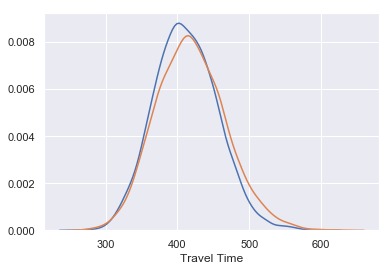

In [25]:
sns.distplot(a = dataslice[dataslice["ASocial"]]["Travel Time"], hist = False)
sns.distplot(a = dataslice[~dataslice["ASocial"]]["Travel Time"], hist = False)
plt.show()

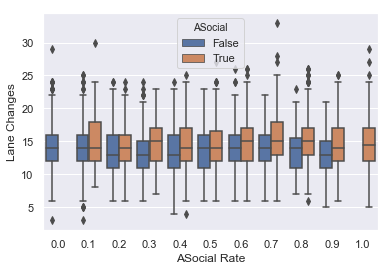

In [28]:
sns.boxplot(x = "ASocial Rate", y = "Lane Changes", data = dataslice, hue = "ASocial")
plt.show()